In [21]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # To see Progress

REBUILD_DATA = False  #Only Rebuild first time (preprocess data first time)

class HappyOrSad():
    IMG_SIZE = 50   #Change size to 50X50

    HAPPY = "FaceExpression/happy"
    SAD = "FaceExpression/sad"

    LABELS = {HAPPY: 0,SAD: 1}

    training_data = []

    happyCount = 0
    sadCount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

                    if label==self.SAD:
                        self.sadCount +=1
                    elif label == self.HAPPY:
                        self.happyCount+=1
                except Exception as e:
                    # pass
                    print(e)
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("SAD  : ",self.sadCount)
        print("HAPPY  : ",self.happyCount)


if REBUILD_DATA:
    happyorsad = HappyOrSad()
    happyorsad.make_training_data()       


In [22]:
np.eye(2)[0]
# np.eye(2)
# [[1,0],
#  [0,1]]

array([1., 0.])

In [25]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [27]:
len(training_data)

305

In [29]:
training_data[0]

array([array([[152, 173, 165, ..., 229, 211, 210],
              [151, 173, 168, ..., 217, 208, 208],
              [154, 174, 169, ..., 201, 190, 193],
              ...,
              [230, 229, 226, ..., 221, 226, 224],
              [231, 228, 228, ..., 211, 226, 225],
              [231, 223, 220, ..., 210, 224, 224]], dtype=uint8),
       array([0., 1.])], dtype=object)

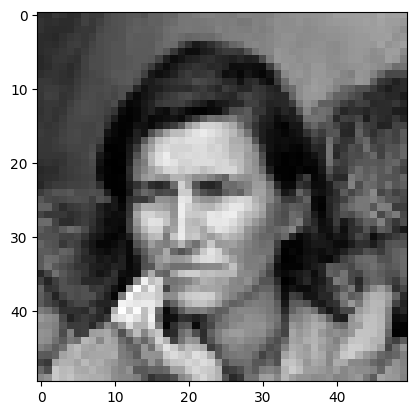

In [41]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],cmap="gray")

In [42]:
training_data[1][1]

array([0., 1.])